In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
sns.set_style("darkgrid")

In [116]:
df = pd.read_csv('../dataset/clean/sample_sorted.csv', header=0)

In [117]:
# Get correlations, unstack so we can iterate through
c = df.corr()
s = c.unstack()
so = s.sort_values(ascending=True)

In [118]:
# Get correlations where features are different
exists = set()
best = []
for pair, corr in so.iteritems():
    if frozenset((pair[0], pair[1])) in exists: continue
    if pair[0] == pair[1]: continue
    exists.add(frozenset((pair[0], pair[1])))
    best.append((pair, corr))

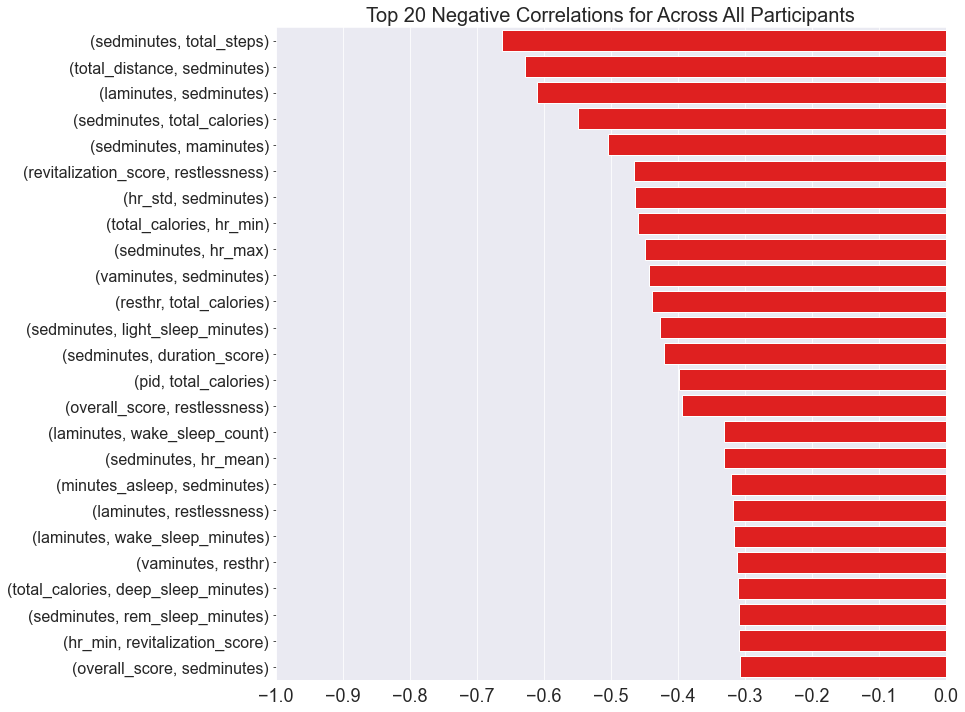

In [122]:
# Plot top 25
plt.figure(figsize=(12,12))
ax = sns.barplot(y=[f'({p[0]}, {p[1]})' for p, _ in best][:25], x=[cval for _, cval in best][:25], color='red')
plt.title('Top 20 Negative Correlations for Across All Participants', fontsize=20)
plt.xticks([-i/10 for i in range(10, -1, -1)], fontsize=18)

# Taken from here to left align: https://stackoverflow.com/questions/15882249/matplotlib-aligning-y-ticks-to-the-left
plt.draw() 
yax = ax.get_yaxis()
pad = max(T.label.get_window_extent().width for T in yax.majorTicks)
ax.yaxis.tick_left()
plt.yticks(fontsize=16)
plt.draw()
plt.show()